<a href="https://colab.research.google.com/github/jdgargiulo/Lectures/blob/main/Script_de_evaluaci%C3%B3n_de_ciclones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script para evaluar la eficiencia de un ciclón siguiendo la tería de Leith y Licht, desarrollada en "Diseño Óptimo de Ciclones" de  Echeverri Londoño, 2006. 

Autor: cátedra Tratamiento de Efluentes Gaseosos, FcEx, UNCPBA, 2023


---




**TUTORIAL:**

*   IMPORTANTE!! antes de modificar algo, guarden una copia en su drive y trabajen sobre su copia
* ARCHIVO->GUARDAR COPIA EN DRIVE


*   Editar los parámetros y ejecutar cada celda de código (click en símbolo de play que aparece cuando se posicionan sobre el código)

*   Revisar ecuaciones, puede que halla cometido errores de tipeo

*   Prestar atención a unidades

*   Revisar los valores de velocidad de saltación


# Parámetros iniciales

In [ ]:
rop<-2000                              # densidad de partículas [kg/m3]
Dp<-seq(0.0000001,0.00003,0.0000001)  # diámetro de particlas [m]
Q<-0.00278                            # caudal entrada [m3/s]

# 1) Definimos los parámetros físicos de diseño (editar dimensiones características)

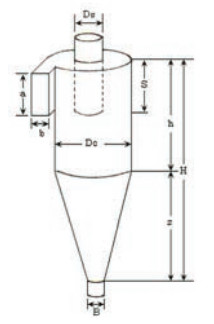

In [ ]:
Dc<-0.05    # Diámetro del ciclón [m]

a<-0.5*Dc    # Altura de entrada (0.018m en turbina)
b<-0.25*Dc   # Ancho de entrada  (0.012m en turbina)
S<-0.625*Dc  # Altura de salida
Ds<-0.5*Dc   # Diámetro de salida
h<-2*Dc      # Altura parte cilíndrica
z<-2*Dc      # Altura parte cónica
H<-4*Dc      # Altura total del ciclón
B<-0.25*Dc   # Diámetro de salida partículas
Vi<-Q/(a*b)  # Velocidad de ingreso
print(paste("Largo del ciclón [metros]:",H))
print(paste("Velocidad de ingreso[m/s]:",Vi))

[1] "Largo del ciclón [metros]: 0.2"
[1] "Velocidad de ingreso[m/s]: 8.896"


# 2) FACTOR DE CONFIGURACIÓN

In [ ]:
# 2.1) Longitud natural del ciclón (L)
L<- 2.9*Ds*(Dc**2/(a*b))**(1/3)
ifelse(L<H-S,print("Long natural correcta"), print("long natural incorrecta"))

# 2.2) Volumen evaluado sobre la salida del ciclón (Vsc)
Vsc<-(pi/4)*(S-a/2)*(Dc**2-Ds**2)

# 2.3) Volumen del ciclón evaluado sobre la long natural (Vr)
Kl<-Dc-(Dc-B)*((S+L-h)/z)
Vr<-(pi/4)*Dc**2*(h-S)+(pi/12)*Dc**2*(L+S-h)*(1+(Kl/Dc)+(Kl/Dc)**2)-(pi/4)*Ds**2*L

# 2.4) Factor de dimensionalidad de proporciones volumétricas (Kc)
Kc<-(Vsc+Vr/2)/(Dc**3)


# 2.5) Factor de Configuración (G)
G<- 8*Kc/((a/Dc*b/Dc)**2)
print(paste("Factor de Configuración:",G))

[1] "Long natural correcta"


[1] "Long natural correcta"

[1] "Factor de Configuración: 408.484750297464"


# 3) TIEMPO DE RELAJACIÓN

In [ ]:
Ti<-(rop*Dp**2)/(18*0.0000174)


# 4) EXPONENTE DE VÓRTICE

In [ ]:
n<- 1-(1-0.67*Dc**0.14)*(273/283)**0.3
print(paste("Exponente de Vórtice:",n))

[1] "Exponente de Vórtice: 0.446490591700199"


# 5) EFICIENCIA FRACCIONAL

In [ ]:
E<-1-exp(-2*(G*Ti*Q*(n+1)/Dc**3)**(0.5/(n+1)))
Eficiencia<-data.frame(Dp*10**6,E)
head(Eficiencia,20)

,Dp...10.6,E
,<dbl>,<dbl>
1,0.1,0.1587497
2,0.2,0.2435651
3,0.3,0.3088866
4,0.4,0.3628467
5,0.5,0.4089942
6,0.6,0.4493075
7,0.7,0.4850403
8,0.8,0.5170535
9,0.9,0.5459716


In [ ]:
# con este código exportan la tabla de eficiencia generada
# click derecho en el archivo generado para descargarlo 
write.csv(Eficiencia, file="Eficiencia.csv", row.names=FALSE)

# 6) VELOCIDAD DE SALTACIÓN


In [ ]:
# 5.1) Velocidad equivalente (W)
W<-(4*9.81*0.0000174*(rop-1)/(3*1**2))**(1/3)

# 5.2 ) Vel de saltación (Vs)
Vs<-4.913*W*(b/Dc)**0.4*Dc**0.067*Vi**(2/3)/(1-b/Dc)**(1/3)
print(paste("Velocidad de saltación[m/s]:",Vs))
ifelse(Vi>1.35*Vs, print("Vel de entrada muy alta"), print("Vel de entrada normal"))

[1] "Velocidad de saltación[m/s]: 8.39047308082432"
[1] "Vel de entrada normal"


[1] "Vel de entrada normal"

# 7) ESTIMACIÓN DE CAIDA DE PRESIÓN (Eq de Shepherd y Lapple)

In [ ]:
# 6.1) N de Cabezas de velocidad a la entrada

Nh<-16*(a*b)/(Ds**2)    ## K=16

## 6.2) Caída de presión [Pa]

DeltaP<-0.5*1*Vi**2*Nh
print(paste("Caída de presión [Pa]:",DeltaP))

[1] "Caída de presión [Pa]: 316.555264"


# **RESUMEN:**

parámetro,Valor
<chr>,<dbl>
Caudal de ingreso,0.002780
Velocidad de ingreso,8.896000
Diámetro del ciclón,0.050000
Largo del ciclón,0.200000
Largo de parte ciclíndrica,0.100000
Largo de parte cónica,0.100000
Velocidad de saltación,8.390473
Caída de presión,316.555264


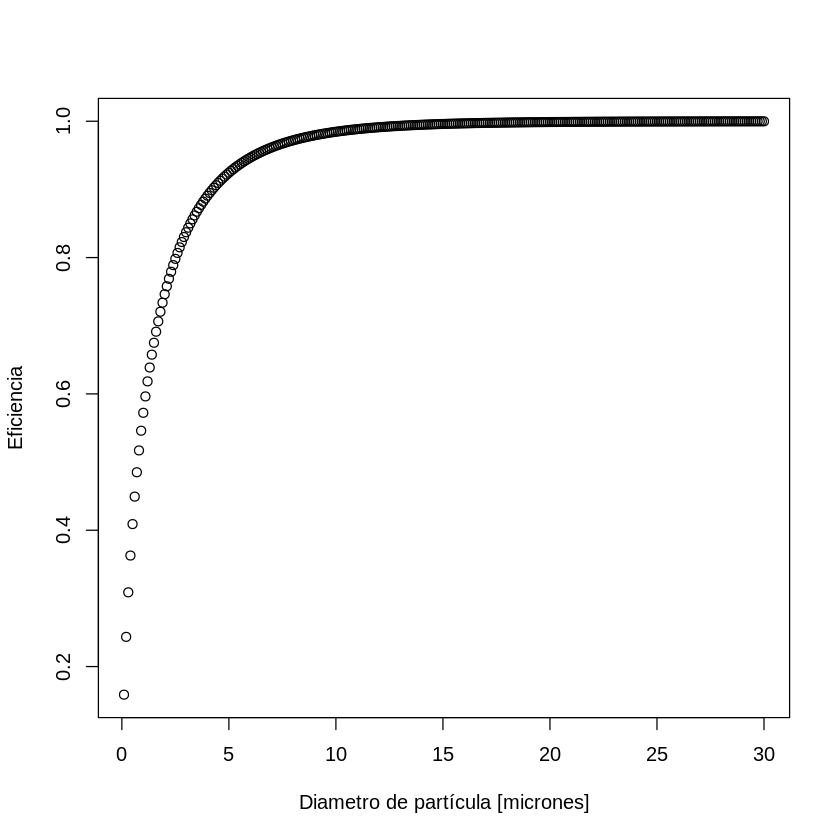

In [ ]:
plot(Dp*10**6,E, xlab = "Diametro de partícula [micrones]", ylab = "Eficiencia")
data.frame(parámetro=c("Caudal de ingreso",
             "Velocidad de ingreso",
              "Diámetro del ciclón",
             "Largo del ciclón",
             "Largo de parte ciclíndrica",
             "Largo de parte cónica",
             "Velocidad de saltación",
             "Caída de presión"),
             Valor=c(Q, Vi,Dc,H,h,z,Vs,DeltaP)
  
)


# Tiempo estimado para recolectar material

In [ ]:
# 1) TSP: MP sedimentable total (rangos 50-100 micrones)
# suponemos una concentración media de 100 microgramos/m3 de TSP y eficiencia 100%
C<-100
MasaTSP<-Q*C*86400/100000 # masa diaria recolectada en gramos
print(paste("Potencial masa de TSP a recuperar[g/día]:",MasaTSP))
print(paste("Potencial masa de TSP en 30 días [g]:",MasaTSP*30))

[1] "Potencial masa de TSP a recuperar[g/día]: 0.240192"
[1] "Potencial masa de TSP en 30 días [g]: 7.20576"


In [ ]:
# 2) MP10: valores de referencia para Tandil tomados de Sosa et al 2017
C_10<-25
Ti_10<-(rop*0.00001**2)/(18*0.0000174)
E_10<-1-exp(-2*(G*Ti_10*Q*(n+1)/Dc**3)**(0.5/(n+1)))
print(paste("Eficiencia de colección MP10:",E_10))
Masa_10<-Q*C_10*86400/100000
print(paste("Potencial masa de MP10 a recuperar[g/día]:",Masa_10))
print(paste("Potencial masa de MP10 en 30 días [g]:",Masa_10*30))

[1] "Eficiencia de colección MP10: 0.984581901467039"
[1] "Potencial masa de MP10 a recuperar[g/día]: 0.060048"
[1] "Potencial masa de MP10 en 30 días [g]: 1.80144"


In [ ]:
# 3) MP2.5: valores de referencia para Tandil tomados de Sosa et al 2017
C_25<-10
Ti_25<-(rop*0.0000025**2)/(18*0.0000174)
E_25<-1-exp(-2*(G*Ti_25*Q*(n+1)/Dc**3)**(0.5/(n+1)))
print(paste("Eficiencia de colección MP2.5:",E_25))
Masa_25<-Q*C_25*86400/100000
print(paste("Potencial masa de MP2.5 a recuperar[g/día]:",Masa_25))
print(paste("Potencial masa de MP2.5 en 30 días [g]:",Masa_25*30))

[1] "Eficiencia de colección MP2.5: 0.79812234013023"
[1] "Potencial masa de MP2.5 a recuperar[g/día]: 0.0240192"
[1] "Potencial masa de MP2.5 en 30 días [g]: 0.720576"
